#Analisis de datos: Discos Protoplanetarios 

Ciencia de Datos

Grupo: 8365  Semestre: 2023-2

Andrés Ledesma Ramírez

##Librerías a usar

In [4]:
# imports
import numpy as np
from IPython.core.display import Image, display
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams


##Visualización de los datos

Se cargaron los datos para posteriormente convertirlos en un dataframe para su posterior análisis descriptivo.

In [5]:
# El conjunto de datos se encuentra en un archivo .csv, el cual es tabular y similar a un .xls (excel)
# Los datos se pueden leer con la libreria pandas como sigue
data = pd.read_csv('circumstellardisks.csv')
# El objeto data contiene una tabla con los datos mencionados, la tabla tiene una cabecera o header
# ¿cómo se ve o cómo es?
data

,Object,Category,Spec Type,R band (mag),Distance (pc),Disk Major Axis &quot;,Disk Diameter (AU),Inclination (degrees),Resolution elements across,At ref. wavelength (microns)
0,2MASSI J1628137-243139,TT,NaN,17.7,140.0,4.300,602.0,86.0,10.8,2.1
1,49 Cet,Debris,A1,5.6,59.0,9.800,578.0,79.0,24.5,850.0
2,61 Vir,Debris,G7V,4.2,8.5,22.000,187.0,77.0,3.7,70.0
3,99 Her,Debris,F7+K4,4.7,15.6,15.400,240.0,50.0,2.8,70.0
4,[MR81] H alpha 17 NE,TT,M2e,16.9,150.0,0.380,57.0,20.0,2.9,2.2
...,...,...,...,...,...,...,...,...,...,...
318,WSB 63,TT,M2,15.2,138.0,0.172,NaN,0.0,0.9,1300.0
319,WSB 67,TT,NaN,13.2,145.0,0.153,NaN,45.0,0.8,1300.0
320,WSB 82,TT,NaN,11.5,156.0,1.640,NaN,61.0,60.7,1300.0
321,WW Cha,TT,K5,13.3,160.0,1.320,211.2,NaN,0.5,3300.0


####Selección y renombramiento

Se eligiaron las columnas de interés para esta investigación y se renombraron (en español).

In [6]:
data.drop(['Object', 'Spec Type', 'R band (mag)', 'Resolution elements across', 'At ref. wavelength (microns)'], axis=1, inplace=True)



In [7]:
data=data.rename(columns={'Category': 'Categoría', 'Distance (pc)': 'Distancia', 'Disk Major Axis &quot;':'Eje_mayor','Disk Diameter (AU)':'Diametro','Inclination (degrees)':'Inclinacion'})
data

,Categoría,Distancia,Eje_mayor,Diametro,Inclinacion
0,TT,140.0,4.300,602.0,86.0
1,Debris,59.0,9.800,578.0,79.0
2,Debris,8.5,22.000,187.0,77.0
3,Debris,15.6,15.400,240.0,50.0
4,TT,150.0,0.380,57.0,20.0
...,...,...,...,...,...
318,TT,138.0,0.172,NaN,0.0
319,TT,145.0,0.153,NaN,45.0
320,TT,156.0,1.640,NaN,61.0
321,TT,160.0,1.320,211.2,NaN


####Resumen estadístico global

Se realizó un resumen estadístico global en el cual se clasificaron las variables por cualitativas y cuantitativas. Para el caso de las variables cuantitativas Se obtuvieron los valores mínimo y máximo, los cuartiles y la media.

In [8]:
data.columns

Index(['Categoría', 'Distancia', 'Eje_mayor', 'Diametro', 'Inclinacion'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Categoría    319 non-null    object 
 1   Distancia    323 non-null    float64
 2   Eje_mayor    322 non-null    float64
 3   Diametro     239 non-null    float64
 4   Inclinacion  313 non-null    float64
dtypes: float64(4), object(1)
memory usage: 12.7+ KB


In [10]:
# ¿Cuántos valores nulos hay en cada columna?
data.isna().sum()

Categoría       4
Distancia       0
Eje_mayor       1
Diametro       84
Inclinacion    10
dtype: int64

Al hacer el diagnóstico de los datos se exhibió la naturaleza de las variables, con cuatro variables cuantitativas y una cualitativa, además de se evidenció que la variable de diámetro fue la variable con la mayor cantidad de datos faltantes (84 de 323) los cuales tenían una carga del 26% de los datos de esta variable. Por lo tanto es necesario fue necesaria la realización de un tratamiento con estos datos faltantes.

In [11]:
# Una vista muy general de la estadística descriptiva de los datos se puede obtener con el método describe
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Categoría,319,10,Debris,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distancia,323.0,NaN,NaN,NaN,189.442601,301.034245,3.22,91.2,140.0,155.0,3500.0
Eje_mayor,322.0,NaN,NaN,NaN,4.419929,9.916898,0.032,0.51225,1.4,4.3,140.0
Diametro,239.0,NaN,NaN,NaN,583.113556,1677.250776,3.8,140.0,240.0,440.0,19800.0
Inclinacion,313.0,NaN,NaN,NaN,54.144728,24.366221,0.0,36.0,57.0,75.0,104.0


####Limpieza de datos faltantes

Para as tres columnas con datos faltantes (sólo las variables numéricas), se tartaron los datos fatantes, fueron reemplazados por el promedio y la meduiana. 

In [12]:
# Sustitumos estas medias globales por todos los datos faltantes en su respectiva columna:
data['Eje_Mayor_nan_mu'] = data.Eje_mayor.fillna(data.Eje_mayor.mean())
data['Eje_Mayor_med'] = data.Eje_mayor.fillna(data.Eje_mayor.median())
data['Diametro_mu'] = data.Diametro.fillna(data.Diametro.mean())
data['Diametro_med'] = data.Diametro.fillna(data.Diametro.median())
data['Inclinacion_mu'] = data.Inclinacion.fillna(data.Inclinacion.mean())
data['Inclinacion_med'] = data.Inclinacion.fillna(data.Inclinacion.median())

data

,Categoría,Distancia,Eje_mayor,Diametro,Inclinacion,Eje_Mayor_nan_mu,Eje_Mayor_med,Diametro_mu,Diametro_med,Inclinacion_mu,Inclinacion_med
0,TT,140.0,4.300,602.0,86.0,4.300,4.300,602.000000,602.0,86.000000,86.0
1,Debris,59.0,9.800,578.0,79.0,9.800,9.800,578.000000,578.0,79.000000,79.0
2,Debris,8.5,22.000,187.0,77.0,22.000,22.000,187.000000,187.0,77.000000,77.0
3,Debris,15.6,15.400,240.0,50.0,15.400,15.400,240.000000,240.0,50.000000,50.0
4,TT,150.0,0.380,57.0,20.0,0.380,0.380,57.000000,57.0,20.000000,20.0
...,...,...,...,...,...,...,...,...,...,...,...
318,TT,138.0,0.172,NaN,0.0,0.172,0.172,583.113556,240.0,0.000000,0.0
319,TT,145.0,0.153,NaN,45.0,0.153,0.153,583.113556,240.0,45.000000,45.0
320,TT,156.0,1.640,NaN,61.0,1.640,1.640,583.113556,240.0,61.000000,61.0
321,TT,160.0,1.320,211.2,NaN,1.320,1.320,211.200000,211.2,54.144728,57.0


In [13]:
data.describe()

,Distancia,Eje_mayor,Diametro,Inclinacion,Eje_Mayor_nan_mu,Eje_Mayor_med,Diametro_mu,Diametro_med,Inclinacion_mu,Inclinacion_med
count,323.000000,322.000000,239.000000,313.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,189.442601,4.419929,583.113556,54.144728,4.419929,4.410579,583.113556,493.882786,54.144728,54.233127
std,301.034245,9.916898,1677.250776,24.366221,9.901487,9.902913,1441.977700,1449.835921,23.984880,23.989994
min,3.220000,0.032000,3.800000,0.000000,0.032000,0.032000,3.800000,3.800000,0.000000,0.000000
25%,91.200000,0.512250,140.000000,36.000000,0.514500,0.514500,180.500000,180.500000,37.000000,37.000000
50%,140.000000,1.400000,240.000000,57.000000,1.400000,1.400000,348.000000,240.000000,54.200000,57.000000
75%,155.000000,4.300000,440.000000,75.000000,4.350000,4.300000,583.113556,333.100000,75.000000,75.000000
max,3500.000000,140.000000,19800.000000,104.000000,140.000000,140.000000,19800.000000,19800.000000,104.000000,104.000000


Comprobamos si ya no hay datos faltantes en las nuevas columnas:




In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Categoría         319 non-null    object 
 1   Distancia         323 non-null    float64
 2   Eje_mayor         322 non-null    float64
 3   Diametro          239 non-null    float64
 4   Inclinacion       313 non-null    float64
 5   Eje_Mayor_nan_mu  323 non-null    float64
 6   Eje_Mayor_med     323 non-null    float64
 7   Diametro_mu       323 non-null    float64
 8   Diametro_med      323 non-null    float64
 9   Inclinacion_mu    323 non-null    float64
 10  Inclinacion_med   323 non-null    float64
dtypes: float64(10), object(1)
memory usage: 27.9+ KB


Haciendo el resumen anterior notamos que ya no hay datos faltantes.

##Análisis global

In [15]:
# ¿Cuántas categorias únicas hay?
data.Categoría.nunique()

10

In [16]:
# ¿Cual es la frecuencia de cada categoria en los datos?
data.Categoría.value_counts()

Debris    103
TT         97
YSO        57
UC         37
HAe        18
Trans       3
YSO?        1
HBe         1
PPN         1
wTT         1
Name: Categoría, dtype: int64

En el análisis global se realizaron graficas de tipo boxplot para cada una de las variables cuantitativas. Los resultados se muestran a continuación.

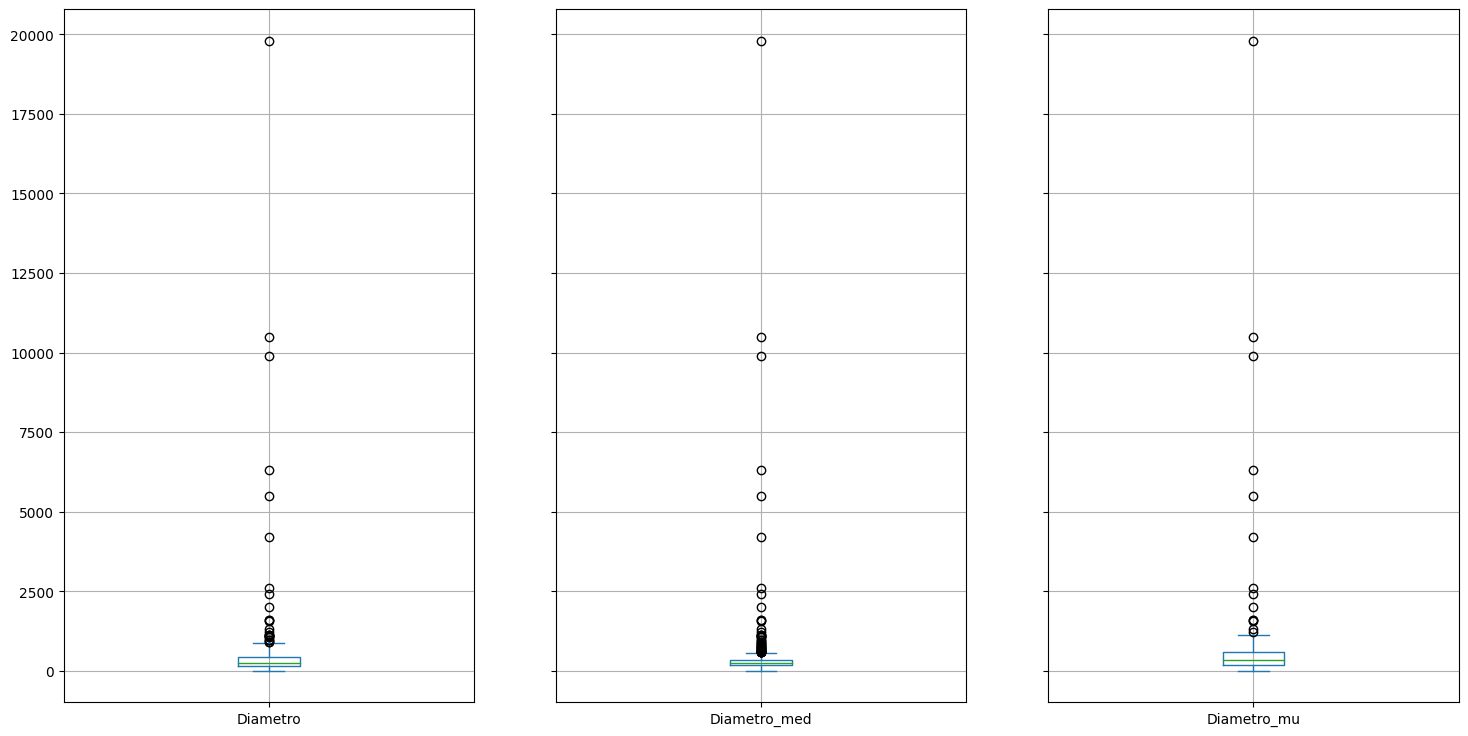

In [17]:
fig, axes = plt.subplots(1,3, figsize=(18, 9), sharey=True)
data['Diametro'].plot(kind='box', ax=axes[0])
data['Diametro_med'].plot(kind='box',ax=axes[1])
data['Diametro_mu'].plot(kind='box',ax=axes[2])
axes[0].grid('on', which='major')
axes[1].grid('on', which='major')
axes[2].grid('on', which='major')

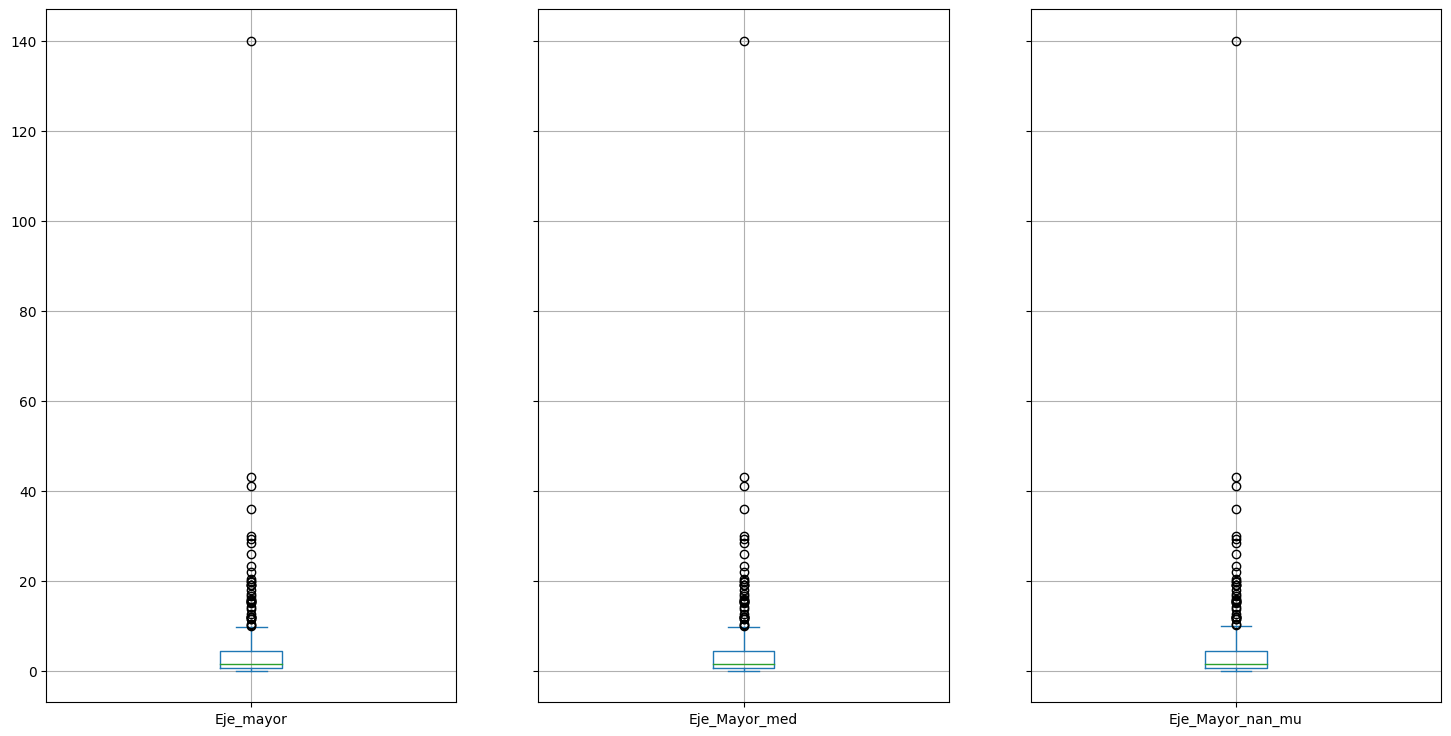

In [18]:
fig, axes = plt.subplots(1,3, figsize=(18, 9), sharey=True)
data['Eje_mayor'].plot(kind='box', ax=axes[0])
data['Eje_Mayor_med'].plot(kind='box',ax=axes[1])
data['Eje_Mayor_nan_mu'].plot(kind='box',ax=axes[2])
axes[0].grid('on', which='major')
axes[1].grid('on', which='major')
axes[2].grid('on', which='major')

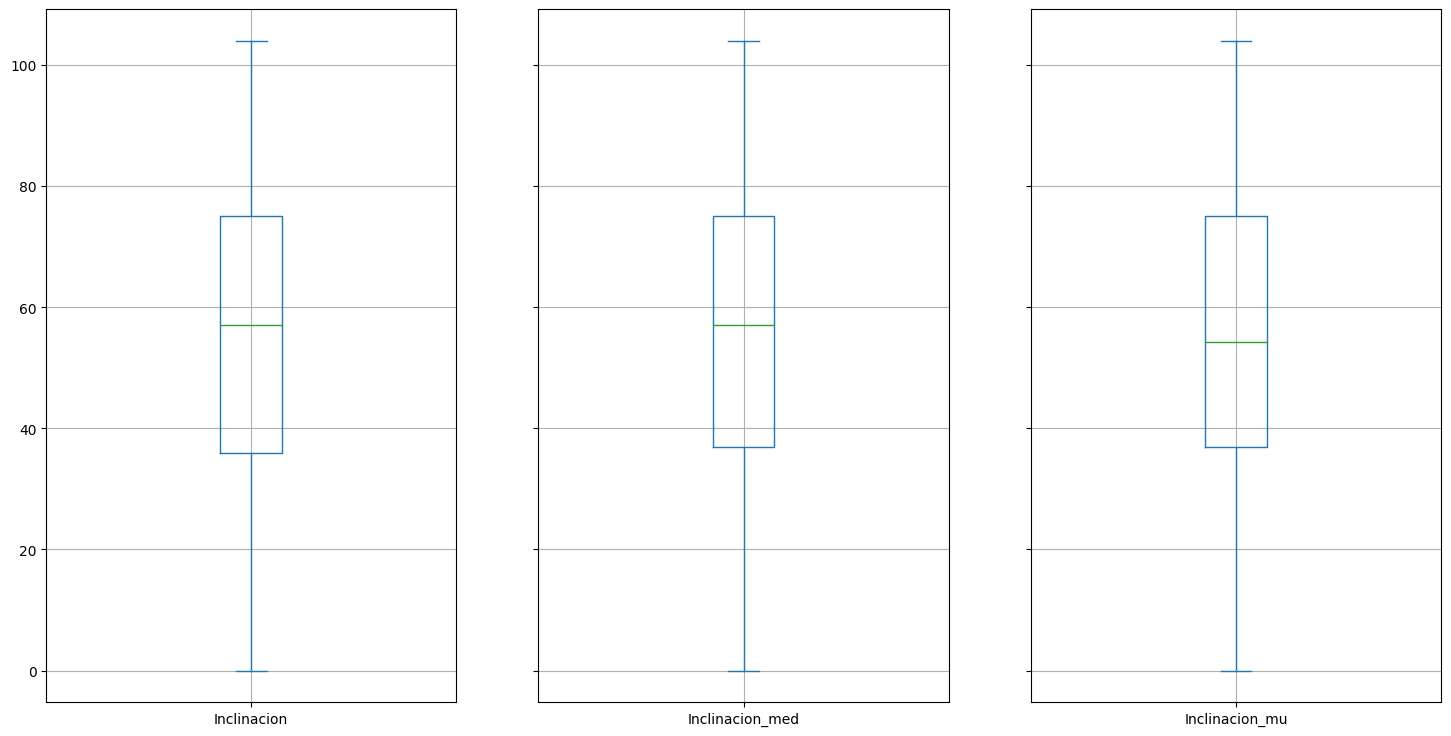

In [19]:
fig, axes = plt.subplots(1,3, figsize=(18, 9), sharey=True)
data['Inclinacion'].plot(kind='box', ax=axes[0])
data['Inclinacion_med'].plot(kind='box',ax=axes[1])
data['Inclinacion_mu'].plot(kind='box',ax=axes[2])
axes[0].grid('on', which='major')
axes[1].grid('on', which='major')
axes[2].grid('on', which='major')

Estos no son los box plot que tenia pensado hacer, es poco pero es trabajo honesto.
Observamos como se modifican las graficas al sustituir los valores faltantes, las diferencias son muy pocas.
Queria graficar para cada categoria (10) los tres boxplot correspondientes a Inclinación, Eje mayor y Diametro. Pero no supe filtrar estos datos correctamente.

Finalmente, realizamos los histogramas de estas variables cuantitativas para obsrevar como se distribuyen. Para el diametro y el eje mayor es evidente que los datos están concentrados en un valor y siguen una distribución parecida a la de Poisson (son las poblaciones). Mientras que para la inclinación tenemos una distribución uniforme entre 20 y 80 grados, lo que nos podria indicar que la manera en que se esta observando u obteniendo estos datos nos impide obtener muchas mediciones fuera de este rango y favorece estos valores para la inclinación.

<Axes: xlabel='Diametro', ylabel='Count'>

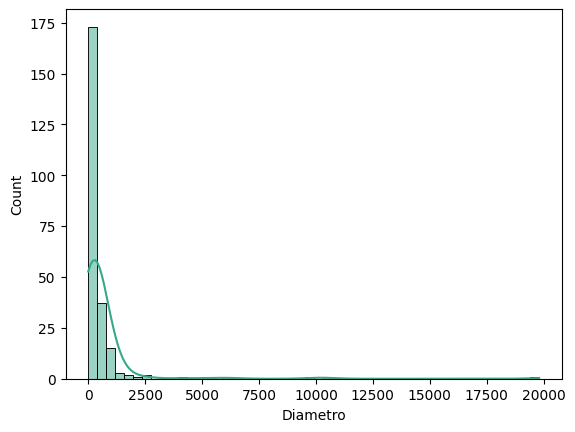

In [20]:
sns.histplot(data=data, x="Diametro", kde=True, bins=50, discrete=False, color='#36a98b')


<Axes: xlabel='Eje_mayor', ylabel='Count'>

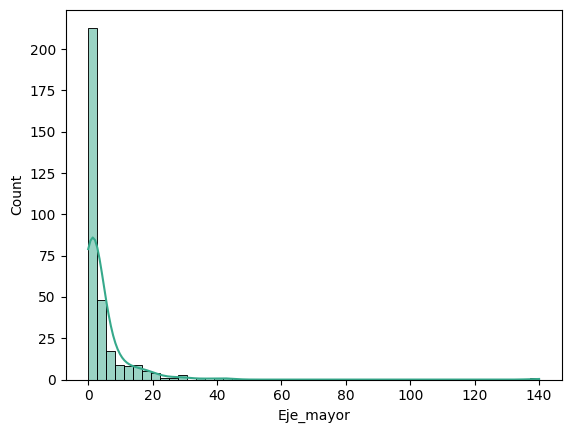

In [21]:
sns.histplot(data=data, x="Eje_mayor", kde=True, bins=50, discrete=False, color='#36a98b')


<Axes: xlabel='Inclinacion', ylabel='Count'>

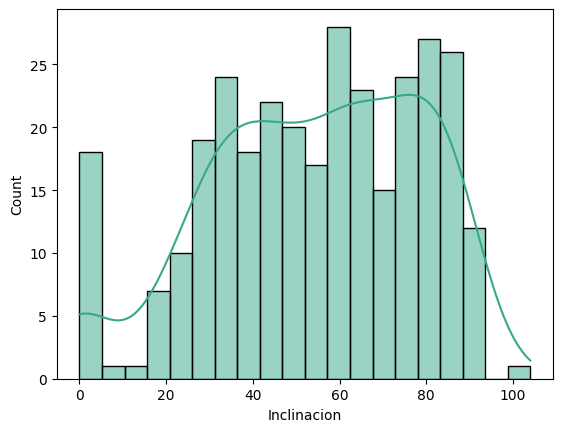

In [25]:
sns.histplot(data=data, x="Inclinacion", kde=True, bins=20, discrete=False, color='#36a98b')
